# Importing Libraries

Dataset : https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset?resource=download

In [19]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.graph_objects as go

# Loading Data

In [20]:
#This dataset was inserted locaclly. Please refer to kaggle for the dataset
df=pd.read_csv('cleaned_dataset/metadata.csv')

# Working On Data

In [21]:
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB


## Filtering Data

In [23]:
impedance_data = df[(df['type'] == 'impedance') & df[['Re', 'Rct']].notna().all(axis=1)]

## Sorting Values

In [24]:
impedance_data = impedance_data.sort_values(by='start_time')

# Plots

## Electrolyte Resistance (Re) vs Time

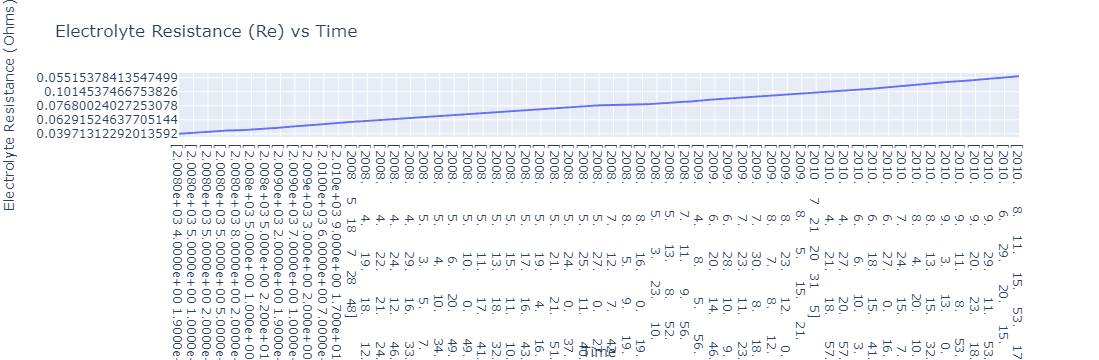

In [25]:
fig1 = px.line(
    impedance_data, x='start_time', y='Re',
    title='Electrolyte Resistance (Re) vs Time',
    labels={'start_time': 'Time', 'Re': 'Electrolyte Resistance (Ohms)'}
)
fig1.show()

## Charge Transfer Resistance (Rct) vs Time

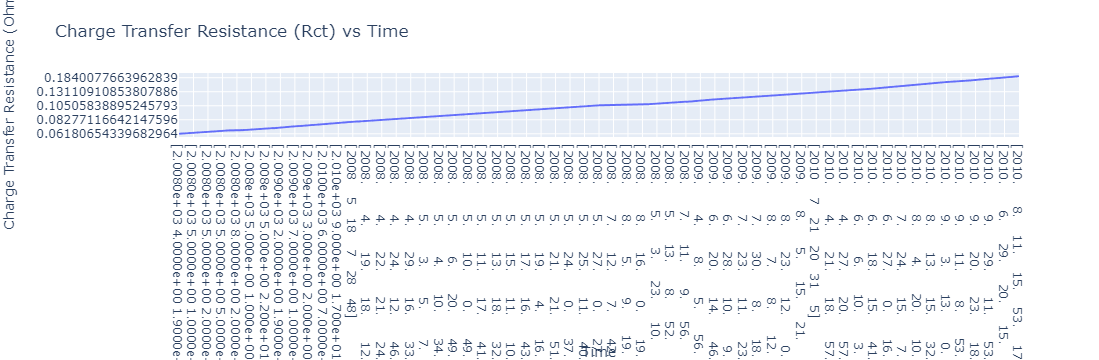

In [26]:
fig2 = px.line(
    impedance_data, x='start_time', y='Rct',
    title='Charge Transfer Resistance (Rct) vs Time',
    labels={'start_time': 'Time', 'Rct': 'Charge Transfer Resistance (Ohms)'}
)
fig2.show()

## Battery Impedance (Re + Rct) vs Time

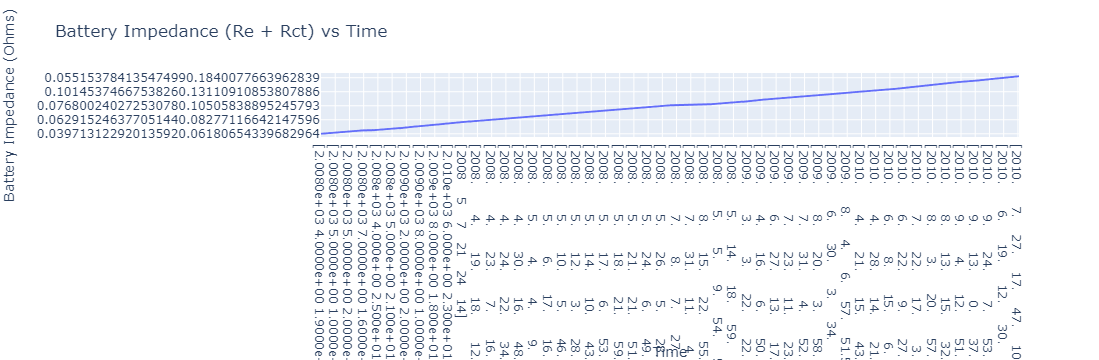

In [27]:
impedance_data['Battery_Impedance'] = impedance_data['Re'] + impedance_data['Rct']
fig3 = px.line(
    impedance_data, x='start_time', y='Battery_Impedance',
    title='Battery Impedance (Re + Rct) vs Time',
    labels={'start_time': 'Time', 'Battery_Impedance': 'Battery Impedance (Ohms)'}
)
fig3.show()

## Combined Plot

In [28]:
fig_combined = go.Figure()

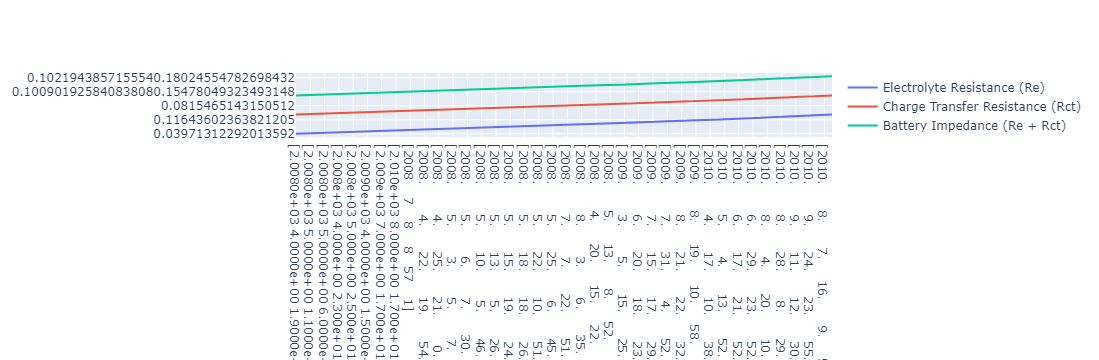

In [29]:
fig_combined.add_trace(go.Scatter(
    x=impedance_data['start_time'], y=impedance_data['Re'],
    mode='lines', name='Electrolyte Resistance (Re)'
))

fig_combined.add_trace(go.Scatter(
    x=impedance_data['start_time'], y=impedance_data['Rct'],
    mode='lines', name='Charge Transfer Resistance (Rct)'
))

fig_combined.add_trace(go.Scatter(
    x=impedance_data['start_time'], y=impedance_data['Battery_Impedance'],
    mode='lines', name='Battery Impedance (Re + Rct)'
))

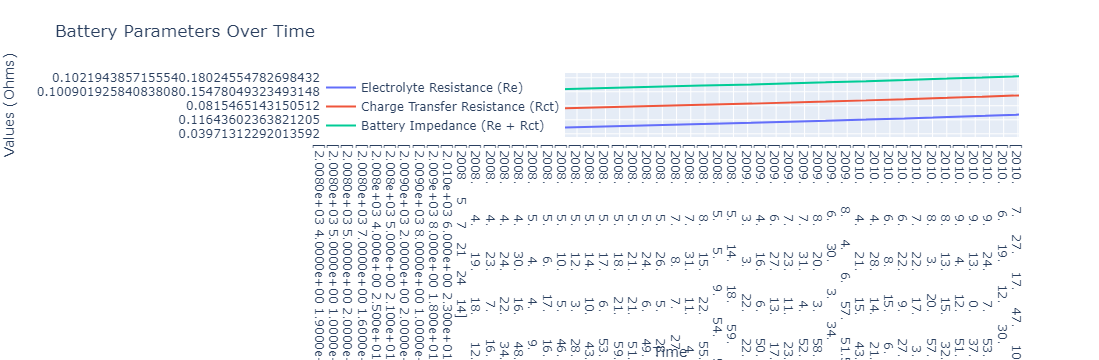

In [30]:
fig_combined.update_layout(
    title='Battery Parameters Over Time',
    xaxis_title='Time',
    yaxis_title='Values (Ohms)',
    legend=dict(x=0, y=1, traceorder='normal')
)
fig_combined.show()